In [1]:
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Economic Data Analysis with Fred & Pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
plt.style.use('ggplot')
pd.set_option('max_columns', 500)
# color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Create The Fred Object

In [15]:
# https://fredaccount.stlouisfed.org/apikey
from fredapi import Fred
from credentials import fred_key

fred = Fred(api_key=fred_key)

# Search for economic data!

In [8]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-01-09,2023-01-09,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 09:23:07-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-01-09,2023-01-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-12-27 08:02:01-06:00,91,"For more information regarding the index, plea..."
SP500,SP500,2023-01-09,2023-01-09,S&P 500,2013-01-07,2023-01-06,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-06 19:10:59-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-01-09,2023-01-09,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 09:23:11-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-01-09,2023-01-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-12-27 08:02:04-06:00,82,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLMCPPSGA670NRUG,PLMCPPSGA670NRUG,2023-01-09,2023-01-09,Price Level of Imports for Singapore,1960-01-01,2019-01-01,Annual,A,Price Level of USA Output-side GDP in 2017=1,Price Level of USA Output-side GDP in 2017=1,Not Seasonally Adjusted,NSA,2021-11-08 13:31:05-06:00,2,Source ID: pl_m When using these data in your...
DDDI05IEA156NWDB,DDDI05IEA156NWDB,2023-01-09,2023-01-09,Liquid Liabilities to GDP for Ireland,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:33:51-05:00,2,Ratio of liquid liabilities to GDP. Liquid lia...
DDDI05FIA156NWDB,DDDI05FIA156NWDB,2023-01-09,2023-01-09,Liquid Liabilities to GDP for Finland,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:33:56-05:00,2,Ratio of liquid liabilities to GDP. Liquid lia...


# Pull Raw Data & Plot


The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. [Wikipedia](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj969H9tbr8AhWVcKQEHaSTDF8QmhN6BAhEEAI&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FS%2526P_500&usg=AOvVaw19cIYvv6H_PnGYc3lowSAm)

In [16]:
SP500 = fred.get_series(series_id='SP500')
SP500

2013-01-07    1461.89
2013-01-08    1457.15
2013-01-09    1461.02
2013-01-10    1472.12
2013-01-11    1472.05
               ...   
2023-01-02        NaN
2023-01-03    3824.14
2023-01-04    3852.97
2023-01-05    3808.10
2023-01-06    3895.08
Length: 2610, dtype: float64

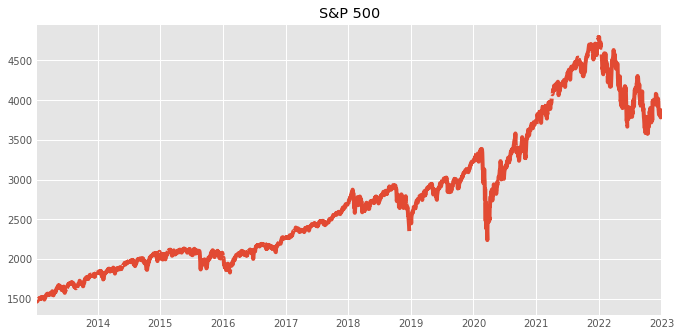

In [17]:
SP500.plot(title='S&P 500', figsize=(10,5));

# Pull and Join Multiple Data Series

In [38]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df.shape

(1000, 15)

In [39]:
unemp_df = unemp_df[(unemp_df.seasonal_adjustment == 'Seasonally Adjusted') & (unemp_df.units == 'Percent')]
unemp_df.shape

(161, 15)

In [40]:
unemp_df = unemp_df[unemp_df['title'].str.contains('Unemployment Rate')]
print(unemp_df.shape)
unemp_df.head()

(99, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-09,2023-01-09,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-01-09,2023-01-09,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,63,The series comes from the 'Current Population ...
CAUR,CAUR,2023-01-09,2023-01-09,Unemployment Rate in California,1976-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-19 17:11:02-06:00,53,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-01-09,2023-01-09,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,49,Series Is Presented Here As Three Variables--(...
LNS14000031,LNS14000031,2023-01-09,2023-01-09,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:29-06:00,53,The series comes from the 'Current Population ...


In [43]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(3) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [46]:
uemp_results.sample(5)

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,LNS14000031,M0892BUSM156SNBR,LNS14000024,U2RATE,FLUR,LNS14000002,NYUR,TXUR,LNS14000003,LNS14027662,LNS14000009,LNS14000001,LRUN64TTUSM156S,LNS14027660,OHUR,PAUR,WAUR,MIUR,LNS14032183,NJUR,MOUR,ILUR,ALUR,WIUR,GAUR,COUR,MAUR,NCUR,TNUR,MNUR,WVUR,VAUR,AZUR,SCUR,KYUR,NMUR,LNS14000018,LNS14000012,ORUR,LNS14000060,LASMT261982000000003,LAUR,ARUR,NVUR,LNS14027659,IAUR,OKUR,LNS14024887,INUR,MDUR,UTUR,MEUR,IDUR,HIUR,NEUR,LRHUTTTTUSM156S,NHUR,MTUR,WYUR,AKUR,MSUR,KSUR,LNS14000028,NDUR,LRUN24TTUSM156S,CTUR,SDUR,LASMT391746000000003,DCUR,PRUR,CMWRUR,LNS14000032,CNERUR,LRUNTTTTUSM156S,LNS14000036,DEUR,RIUR,VTUR,LNS14027689,CSOUUR,LNS14024230,LNS14000029,LNS14000315,LNS14000089,CNEWUR,LNS14100000,LNS14200000,LNS14000091,CWSTUR,LNS14000026,LNS14000150,LNS14000048,LNS14000025,LNS14023705,LNS14000173
1949-03-01,5.0,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,4.1,NaN,NaN,NaN,3.6,NaN,4.0,NaN,3.8,4.6,NaN,3.4
1963-05-01,5.9,NaN,NaN,NaN,NaN,NaN,4.9,NaN,NaN,6.7,NaN,NaN,5.2,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,8.5,NaN,NaN,NaN,NaN,NaN,4.4,5.0,5.4,5.3,NaN,NaN,NaN,4.0,NaN,5.5,3.4,4.4,4.5,NaN,3.3
1969-12-01,3.5,NaN,NaN,NaN,NaN,NaN,2.7,1.4,NaN,4.5,NaN,NaN,3.3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.9,NaN,NaN,NaN,NaN,NaN,2.1,3.3,3.8,2.8,NaN,3.2,5.7,2.1,NaN,3.5,1.7,2.3,2.3,0.5,1.6
1993-09-01,6.7,12.5,9.4,NaN,11.7,NaN,6.1,3.7,7.2,6.4,7.8,7.1,5.9,2.8,10.0,7.0,6.835165,6.2,6.5,6.8,7.1,7.3,NaN,7.4,6.2,7.3,7.1,4.3,5.6,5.0,6.9,4.8,5.6,4.7,10.0,5.0,6.0,7.2,5.9,7.2,38.1,18.2,6.9,5.7,7.2,7.4,6.0,6.8,10.7,4.0,5.7,12.6,4.4,5.9,3.8,6.9,5.9,4.3,2.6,6.7,5.6,6.0,5.4,7.7,6.5,4.9,5.6,4.2,12.6,6.1,3.4,6.0,8.4,17.0,5.9,10.3,7.2,6.7,9.7,5.0,7.2,4.8,5.1,6.4,4.6,5.1,4.6,6.9,6.5,6.6,7.1,5.3,7.9,5.8,4.3,5.6,6.3,0.7,5.4
2003-01-01,5.8,10.5,6.9,NaN,10.4,NaN,5.2,3.2,4.7,5.4,6.3,6.7,5.2,3.0,7.9,6.2,5.928818,5.2,6.0,5.8,7.2,6.5,5.5,5.9,5.4,6.6,5.9,5.5,5.3,5.9,5.6,6.8,5.1,4.5,6.7,4.4,6.0,6.9,6.0,5.6,30.7,17.2,7.6,4.8,6.7,6.1,5.4,5.5,8.8,4.2,5.1,12.0,5.0,4.7,5.8,5.0,5.5,3.7,3.8,5.8,4.6,4.6,4.4,7.5,6.4,5.1,5.0,3.5,12.0,5.2,3.3,5.2,7.0,11.9,5.6,8.6,5.8,5.8,9.4,4.4,5.7,4.4,4.7,5.7,4.1,4.2,3.5,6.0,5.3,6.0,5.4,4.6,6.6,4.9,3.6,4.7,5.6,0.6,4.8


In [51]:
# kepp only cols with 4 letters
cols_to_drop = []
for col in uemp_results:
    if len(col) > 4:
        cols_to_drop.append(col)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

uemp_results.sample(5)

,CAUR,FLUR,NYUR,TXUR,OHUR,PAUR,WAUR,MIUR,NJUR,MOUR,ILUR,ALUR,WIUR,GAUR,COUR,MAUR,NCUR,TNUR,MNUR,WVUR,VAUR,AZUR,SCUR,KYUR,NMUR,ORUR,LAUR,ARUR,NVUR,IAUR,OKUR,INUR,MDUR,UTUR,MEUR,IDUR,HIUR,NEUR,NHUR,MTUR,WYUR,AKUR,MSUR,KSUR,NDUR,CTUR,SDUR,DCUR,PRUR,DEUR,RIUR,VTUR
1935-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,8.4,5.4,7.9,6.4,5.7,7.1,5.8,6.2,6.9,4.8,6.7,3.7,4.3,4.4,6.1,6.4,5.2,4.9,3.7,5.6,4.5,5.8,4.3,4.7,7.2,6.1,6.1,4.6,9.2,4.4,4.7,4.2,5.7,3.0,4.8,3.9,6.6,2.6,3.9,3.6,5.0,7.0,6.4,3.5,4.3,7.0,3.2,6.6,8.2,5.8,6.0,3.8
1932-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,8.1,8.1,8.8,5.3,6.1,7.6,8.1,8.2,8.9,6.0,6.3,7.1,4.9,6.6,6.2,7.6,5.7,6.1,5.1,6.8,5.4,8.2,6.6,4.7,7.4,6.8,6.8,6.4,6.3,4.1,4.6,5.8,5.9,5.2,8.1,5.9,7.2,3.5,5.3,6.2,3.0,10.0,7.4,3.8,4.5,6.7,3.2,8.7,20.2,7.8,7.8,6.8
1935-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have lots of NaNs

In [53]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()
uemp_states.sample(10)

,CAUR,FLUR,NYUR,TXUR,OHUR,PAUR,WAUR,MIUR,NJUR,MOUR,ILUR,ALUR,WIUR,GAUR,COUR,MAUR,NCUR,TNUR,MNUR,WVUR,VAUR,AZUR,SCUR,KYUR,NMUR,ORUR,LAUR,ARUR,NVUR,IAUR,OKUR,INUR,MDUR,UTUR,MEUR,IDUR,HIUR,NEUR,NHUR,MTUR,WYUR,AKUR,MSUR,KSUR,NDUR,CTUR,SDUR,DCUR,PRUR,DEUR,RIUR,VTUR
1992-02-01,8.8,8.4,8.4,7.6,7.1,7.4,6.9,9.5,7.9,6.2,8.4,7.5,5.0,7.4,5.9,9.0,6.4,6.7,5.0,11.4,6.4,7.8,6.7,7.1,7.4,7.3,7.6,7.3,6.6,4.6,6.1,5.9,6.7,5.0,7.8,6.5,3.6,2.8,7.2,6.8,5.5,9.2,8.1,4.3,4.5,7.3,3.4,8.4,17.1,5.4,9.1,6.2
2000-02-01,5.0,3.7,4.6,4.7,4.2,4.1,4.9,3.2,3.7,3.0,4.3,4.7,3.1,3.6,2.7,3.0,3.4,3.8,2.9,5.7,2.5,4.0,3.9,4.0,5.1,5.0,4.9,4.3,3.9,2.5,3.1,3.1,3.3,3.1,3.6,4.6,4.5,2.7,2.8,4.9,3.9,6.2,5.5,3.6,3.0,2.2,2.4,5.7,10.8,3.4,4.2,2.7
1990-04-01,5.3,5.9,5.0,6.2,5.6,5.2,5.1,7.4,4.7,5.5,6.1,6.7,4.1,5.1,5.1,5.8,3.6,5.1,4.6,8.0,4.0,5.4,4.7,5.7,6.4,5.1,5.8,6.7,4.4,4.3,5.1,5.0,3.8,4.4,4.6,5.4,2.7,2.3,4.9,5.6,5.1,7.2,7.3,4.0,4.0,4.6,3.6,5.4,14.2,3.5,5.8,4.3
1993-04-01,9.6,7.6,8.0,7.3,6.8,7.0,7.5,7.3,8.1,6.4,7.8,7.4,4.3,5.8,5.7,7.6,5.4,6.2,5.0,10.6,5.3,6.6,7.6,6.5,7.5,7.2,7.4,6.2,7.0,4.3,5.7,5.6,6.1,4.2,6.7,6.3,4.3,2.9,6.5,6.3,5.3,7.8,6.9,5.0,4.3,6.8,3.6,8.4,17.3,4.7,7.7,5.6
2017-07-01,4.8,4.2,4.7,4.2,5.0,4.9,4.6,4.5,4.5,3.6,5.0,4.3,3.3,4.7,2.6,3.8,4.5,3.5,3.4,5.1,3.6,4.9,4.2,4.8,6.0,4.1,4.9,3.7,4.8,3.1,4.0,3.5,4.0,3.2,3.4,3.1,2.1,2.9,2.8,4.1,4.2,6.5,5.2,3.6,2.5,4.4,3.1,6.1,10.4,4.5,4.5,2.9
2020-10-01,9.5,7.2,9.3,7.1,6.8,8.3,7.1,7.5,7.5,5.5,8.1,5.3,5.0,5.6,6.1,8.6,5.8,6.1,5.5,6.9,5.6,6.7,5.3,4.9,8.4,6.8,8.0,5.4,12.1,4.5,5.4,5.5,6.2,3.9,4.1,4.3,12.1,2.9,5.2,4.5,5.3,7.3,6.8,4.7,5.3,8.1,3.7,8.2,9.0,5.3,6.9,4.0
2011-04-01,12.0,10.3,8.2,8.1,9.0,7.6,8.7,10.0,9.4,8.9,9.6,9.9,7.6,10.3,8.7,7.4,10.2,9.3,6.7,8.0,6.5,9.6,10.7,9.5,7.1,9.6,7.5,8.0,13.5,5.7,5.6,8.7,7.3,7.7,7.8,8.4,6.7,4.5,5.4,6.8,6.2,7.8,9.9,6.5,3.4,9.2,4.8,10.3,16.5,7.7,11.0,5.8
2022-01-01,5.7,3.5,5.3,4.8,4.3,5.4,4.4,4.9,5.1,3.8,5.0,3.1,3.0,3.2,4.2,4.8,3.9,3.5,2.9,4.1,3.3,3.7,3.5,4.4,5.9,4.2,4.3,3.2,5.2,3.7,2.7,2.4,5.4,2.2,4.1,3.0,4.3,2.2,2.9,2.7,3.8,5.6,4.6,2.6,3.1,5.3,2.8,6.3,7.1,4.8,4.2,3.0
2019-09-01,4.1,3.1,3.9,3.6,4.3,4.5,4.2,4.1,3.5,3.1,3.7,2.9,3.3,3.5,2.5,3.0,3.9,3.4,3.5,5.0,2.6,4.8,2.4,4.1,4.7,3.6,4.7,3.5,3.8,2.7,3.2,3.3,3.6,2.5,2.8,3.0,2.0,3.2,2.7,3.6,4.0,5.4,5.6,3.1,2.1,3.5,2.8,5.0,8.0,3.8,3.6,2.5
1987-08-01,5.6,5.3,4.7,8.4,6.8,5.7,7.1,8.4,4.0,6.2,7.3,7.8,5.6,5.5,7.1,3.2,4.4,6.4,5.1,10.8,3.9,6.1,5.1,7.9,8.8,6.1,11.5,8.0,6.2,5.6,6.8,6.0,4.2,6.1,4.3,7.4,3.6,4.2,2.3,7.4,7.7,9.9,9.8,4.7,4.9,3.0,4.2,6.0,16.2,2.9,3.6,3.6


In [71]:
# rename indexes back to states
id_to_state = unemp_df['title'].str.replace('Unemployment Rate - ','')\
    .str.replace('Unemployment Rate in ','').str.replace('Unemployment Rate - ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [72]:
# Plot States Unemployment Rate with plotly
px.line(uemp_states)

# Pull May 2020 Unemployment Rate Per State 

plot the peak

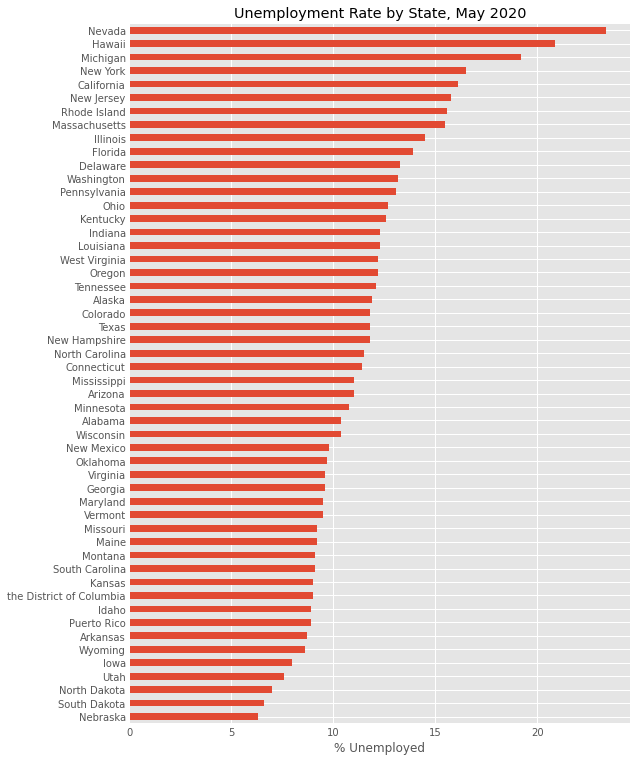

In [81]:
uemp_states[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), title='Unemployment Rate by State, May 2020')
plt.legend().remove()
plt.xlabel('% Unemployed');

# Pull Participation Rate


In [103]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [104]:
results = []

for myid in part_df.index:
    res = fred.get_series(myid)
    res = res.to_frame(name=myid)
    results.append(res)
    time.sleep(2) # Don't request to fast and get blocked

part_states = pd.concat(results, axis=1)

In [111]:
part_states = pd.concat(results, axis=1)

In [112]:
# rename indexes back to states
id_to_state = part_df['title'].str.replace('Labor Force Participation Rate - ','').str.replace('Labor Force Participation Rate for ','').to_dict()
part_states.columns = [id_to_state[c] for c in part_states.columns]

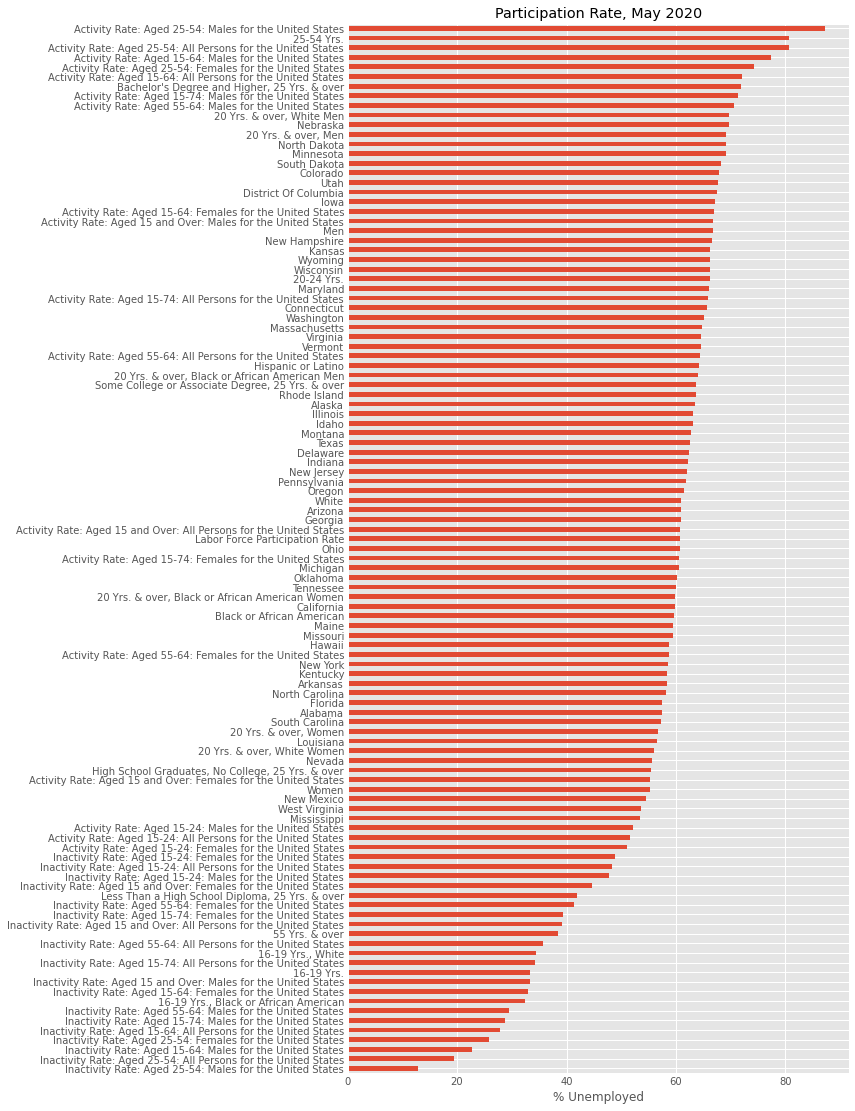

In [113]:
part_states[part_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,18), title='Participation Rate, May 2020')
plt.legend().remove()
plt.xlabel('% Unemployed');

## Plot Unemployment vs Participation for each state!

In [115]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

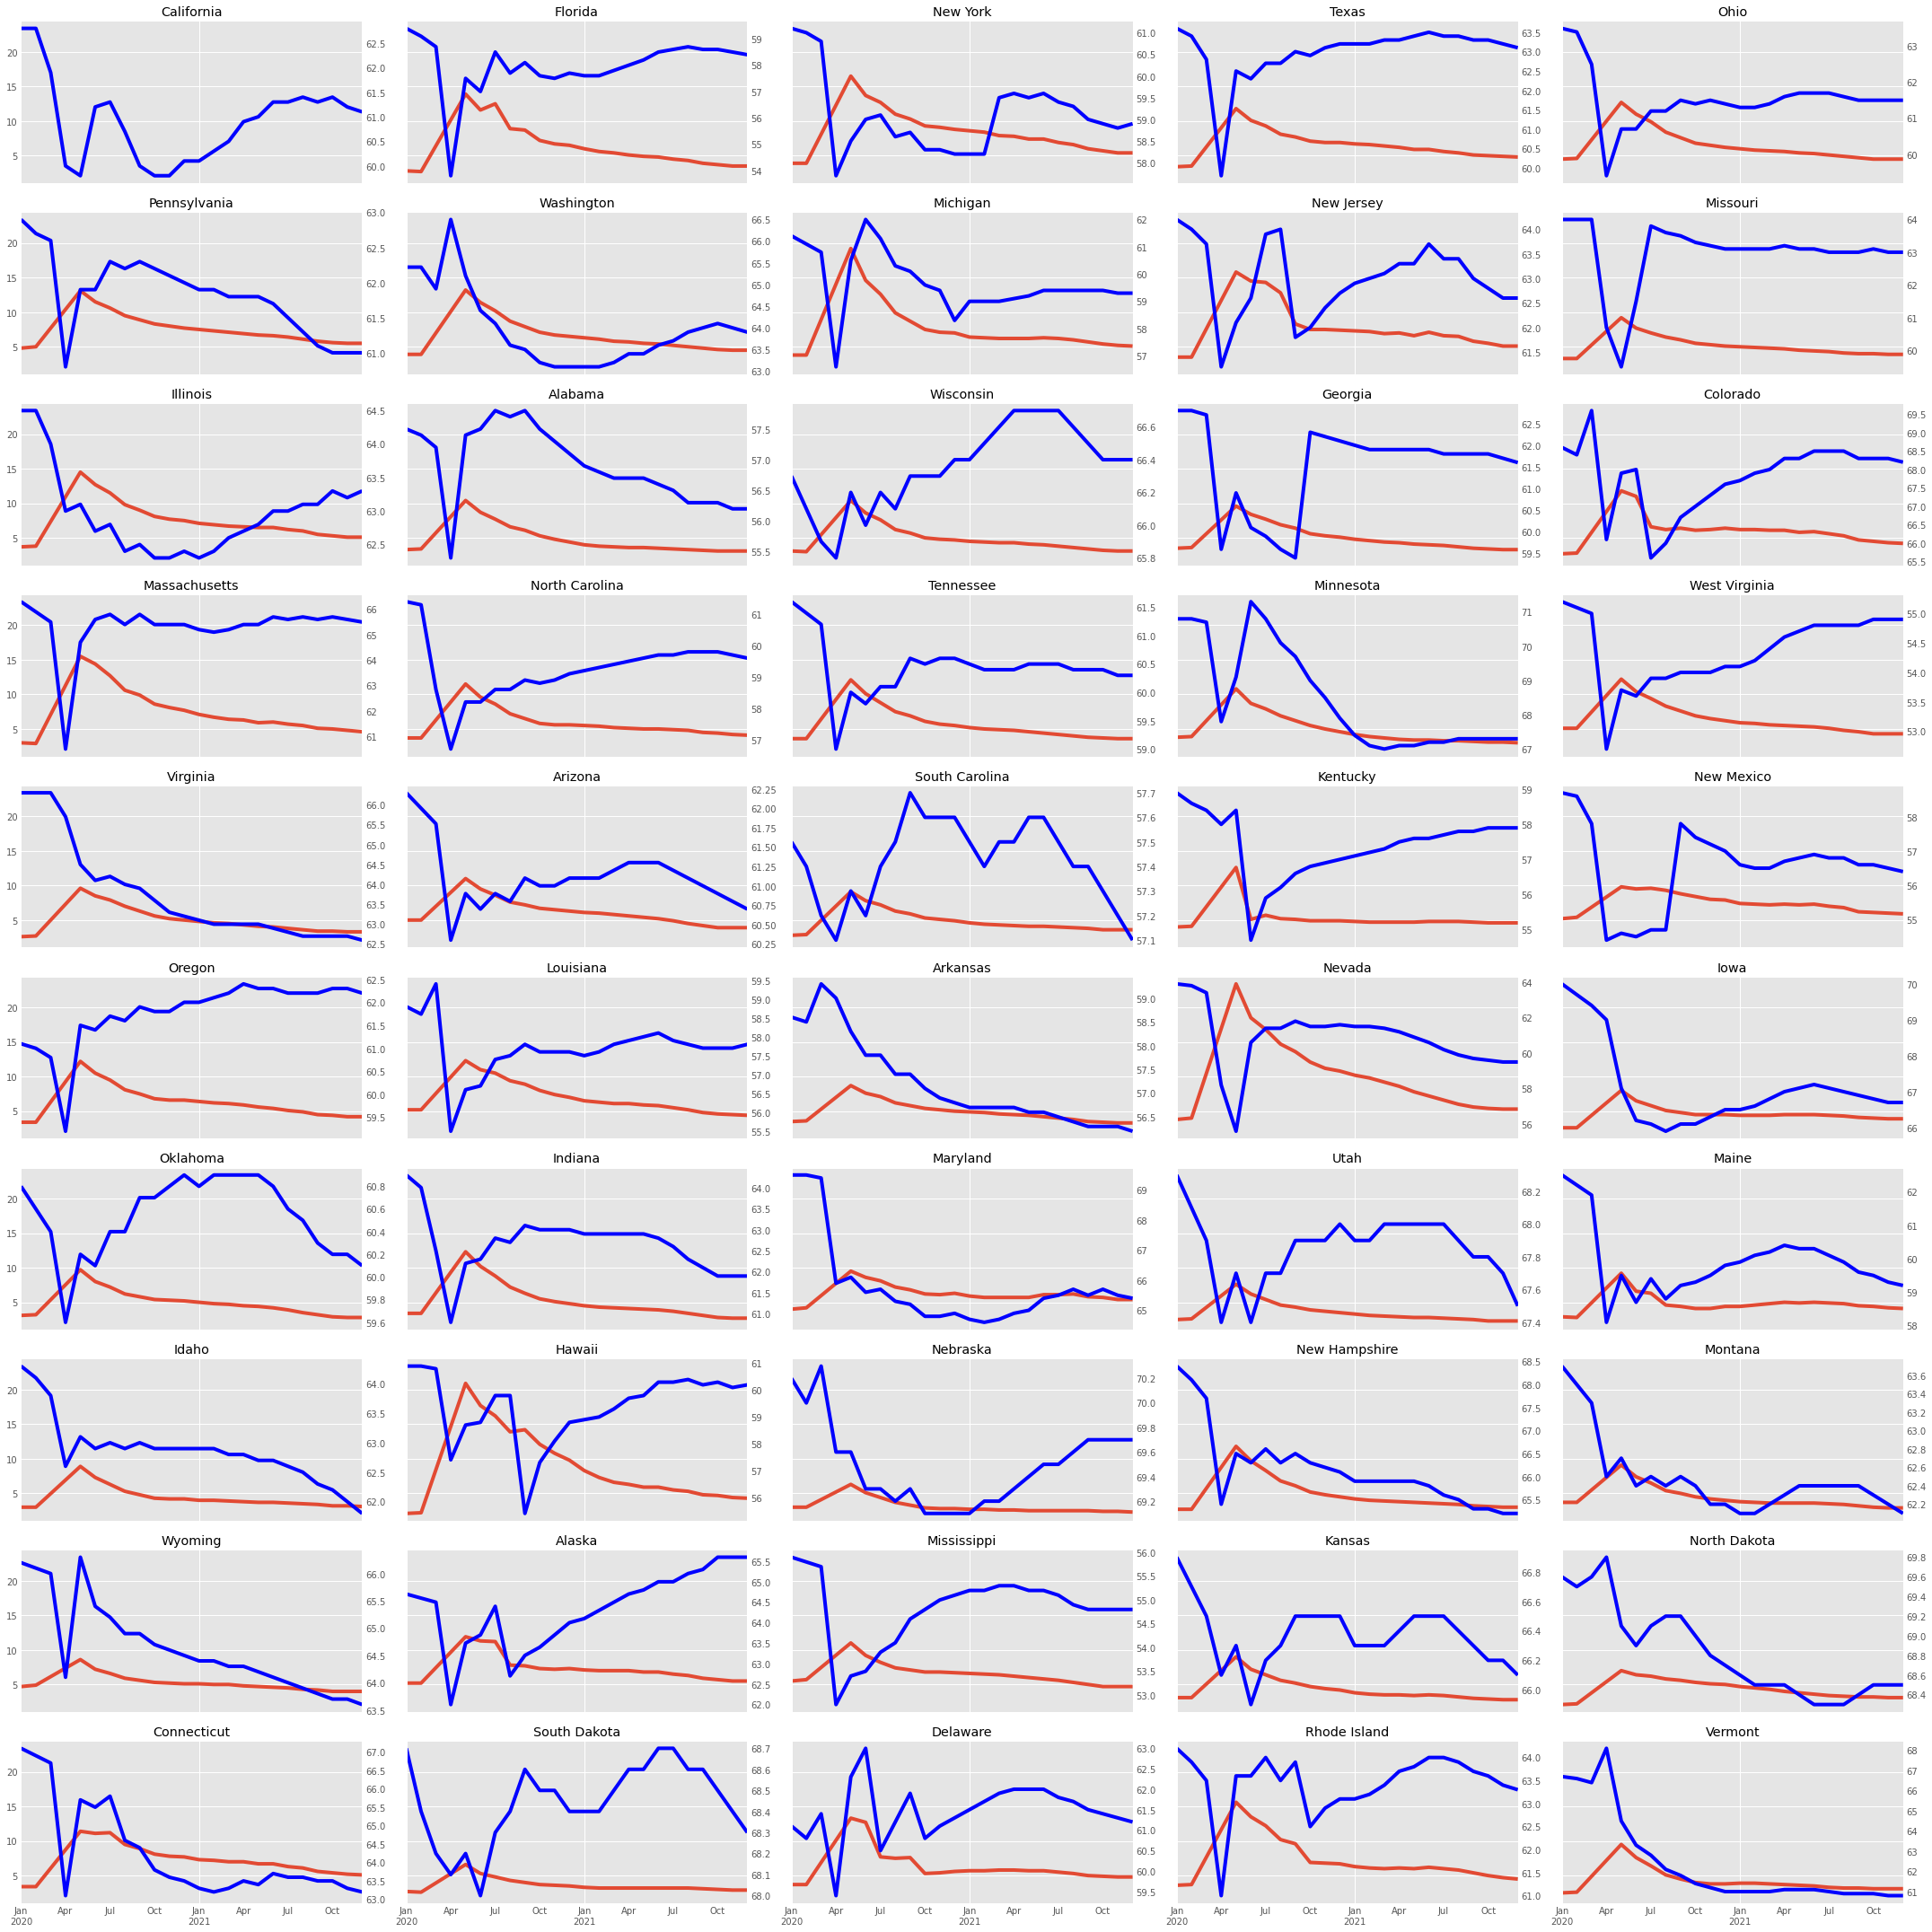

In [121]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True, sharey=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]: # execlude
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.dropna().query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color='blue')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout();

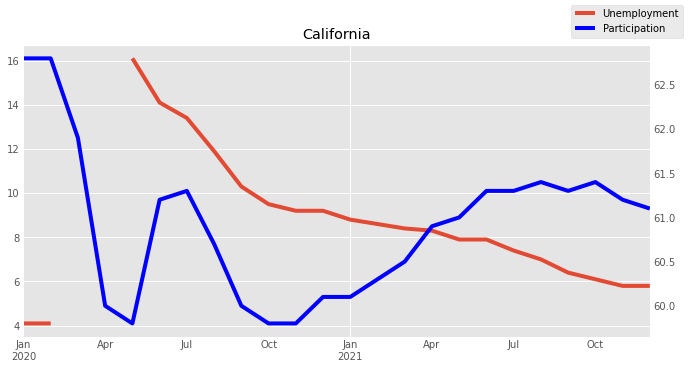

In [120]:
# I always wanted to live in LA, let's check for California
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color='blue')
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()
